## cVAE convergence evaluation

GANs were not good enough. Switching to VAEs because convergence is demonstrable.

In [1]:
## blob names
cgan_model_name = 'cvae-model.h5'
cvae_simulated_data_name = 'cvae-example-data.pkl'
cvae_fit_stats_name = 'cvae-fit-stats.pkl'

In [2]:
## get data from storage 
!gsutil cp gs://gdax-dnn-tmp-1/cvae-model.h5 .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-example-data.pkl .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-fit-stats.pkl . 
!gsutil cp gs://gdax-dnn-tmp-1/cvae-data.pkl .
!gsutil cp gs://gdax-dnn-tmp-1/cvae-embedding-sample.pkl .

Copying gs://gdax-dnn-tmp-1/cvae-model.h5...
/ [1 files][415.7 KiB/415.7 KiB]                                                
Operation completed over 1 objects/415.7 KiB.                                    
Copying gs://gdax-dnn-tmp-1/cvae-example-data.pkl...
/ [1 files][ 78.3 KiB/ 78.3 KiB]                                                
Operation completed over 1 objects/78.3 KiB.                                     
Copying gs://gdax-dnn-tmp-1/cvae-fit-stats.pkl...
/ [1 files][ 75.1 KiB/ 75.1 KiB]                                                
Operation completed over 1 objects/75.1 KiB.                                     
Copying gs://gdax-dnn-tmp-1/cvae-data.pkl...
/ [1 files][ 33.6 MiB/ 33.6 MiB]                                                
Operation completed over 1 objects/33.6 MiB.                                     
Copying gs://gdax-dnn-tmp-1/cvae-embedding-sample.pkl...
/ [1 files][273.6 KiB/273.6 KiB]                                                
Operation complet

In [3]:
#### Loss should converge to zero

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_stat(stats):
    plt.plot(stats)
    plt.show()
    pass

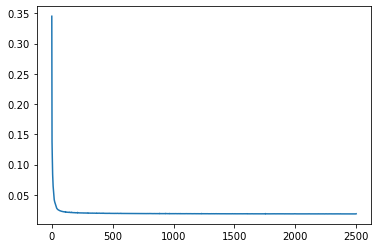

In [5]:
import pickle 
with open(cvae_fit_stats_name, 'rb') as f:
    losses = pickle.load(f)

plot_stat(losses)

In [6]:
losses[-1]

0.018761127253237645

#### Simulated data histrogram should resembe real

In [7]:
## load pickle files 
with open(cvae_simulated_data_name, 'rb') as f:
    cvae_simulated_data = pickle.load(f)
#with open(cvae_fit_stats_name, 'rb') as f: ## does not pickle 
#    cvae_fit_stats = pickle.load(f)

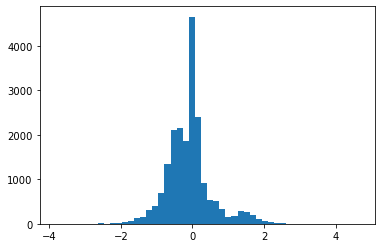

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def hist(x, num_bins=50, **kwargs):
    plt.hist(x, num_bins, **kwargs)
    plt.show()
    pass

hist(cvae_simulated_data.flatten())

In [9]:
with open('cvae-data.pkl', 'rb') as f:
    cgan_data = pickle.load(f)

In [10]:
import numpy as np
import random 
idx = np.random.choice(cgan_data[0].shape[0], 1000)
x = cgan_data[0][idx,:]

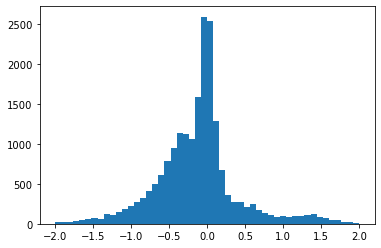

In [11]:
hist(x.flatten(), range=(-2, 2))

#### Embedding should be normally distributed, uncorrelated 

In [12]:
with open('cvae-embedding-sample.pkl', 'rb') as f:
    cvae_embedding_sample = pickle.load(f)

In [13]:
def scatter(x, y):
    plt.scatter(x, y)
    plt.xlim((-4,4))
    plt.ylim((-4,4))
    plt.show()
    pass

In [14]:
cvae_embedding_sample.shape

(10000, 7)

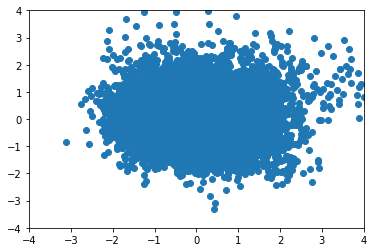

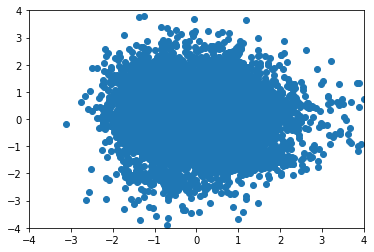

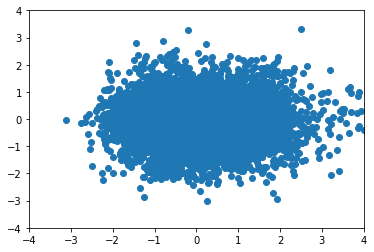

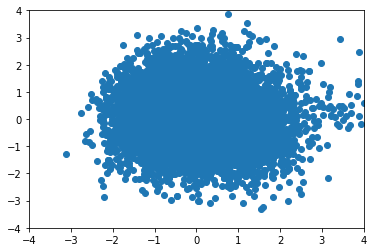

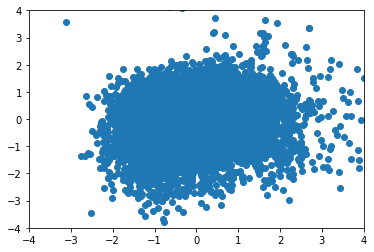

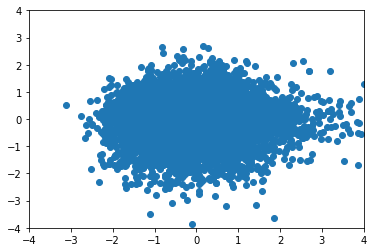

In [15]:
for idx in range(1, cvae_embedding_sample.shape[1]):
    scatter(cvae_embedding_sample[:,0], cvae_embedding_sample[:,idx])

In [19]:
for idx in range(cvae_embedding_sample.shape[1]):
    print('Dimension '+str(idx))
    print(cgan_data[0][:100, idx])
    print(cvae_embedding_sample[:100, idx])

Dimension 0
[-0.39923114 -0.505967   -0.36297417 -0.31109947 -0.20152676 -0.3301069
 -0.26739198 -0.2727456  -0.12591457 -0.16905959 -0.41354963 -0.29762107
 -0.34778    -0.392404   -0.54771984 -0.23705116 -0.23770064 -0.30293626
 -0.3774097  -0.4313112  -0.37768787 -0.39665088 -0.38737425 -0.45765343
 -0.5830083  -0.6174207  -0.54490876 -0.49640346 -0.43462315 -0.3711099
 -0.3048557  -0.1915208  -0.12055194 -0.07931799 -0.11115877 -0.17310981
 -0.3372794  -0.54584557 -0.44649282 -0.62259126 -0.4881273  -0.43410254
 -0.50979674 -0.41545692 -0.37355793 -0.3830169  -0.47400594 -0.45299906
 -0.49416175 -0.4058441  -0.31076038 -0.3806178  -0.5142568  -0.5329205
 -0.19195297 -0.30785668 -0.43601632 -0.29142934 -0.10287835 -0.19927043
 -0.3589262  -0.5260569  -0.330446   -0.3210863  -0.3477226  -0.33999363
 -0.44233203 -0.35266852 -0.373113   -0.53384435 -0.38628006 -0.4409282
 -0.6082649  -0.73085856 -0.6438143  -0.62635994 -0.6291901  -0.6141193
 -0.6141193  -0.4597627  -0.31348693 -0.2855